In [1]:
#pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from copy import deepcopy

In [3]:
from skimage import io
from skimage import color
from skimage import data
from pylab import *

Ejercicio 1.

Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.

imagen original

<class 'numpy.ndarray'>


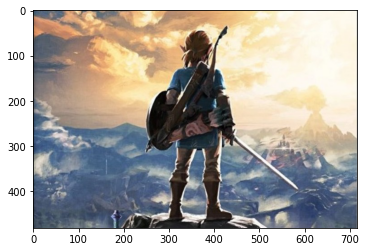

In [4]:
img1 = mpimg.imread('/content/link_horizon.jpg')
plt.imshow(img1)
print(type(img1))

modificacion de contraste y Brillo

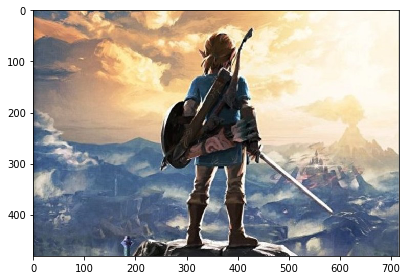

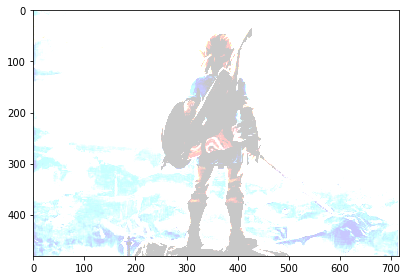

In [5]:
new_image = np.zeros(img1.shape,img1.dtype)

contrast = 3.0
bright = 2

for y in range (img1.shape[0]):
  for x in range (img1.shape[1]):
    for c in range (img1.shape[2]):
      new_image[y,x,c] = np.clip(contrast*img1[y,x,c]+ bright,200,255)

figure(0)
io.imshow(img1)
figure(1)
io.imshow(new_image)



modificacion de de brillo

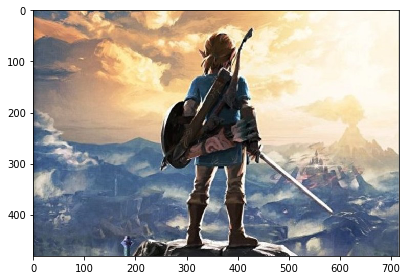

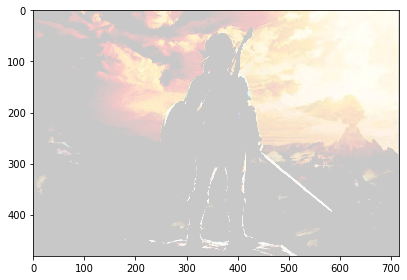

In [6]:
new_image = np.zeros(img1.shape,img1.dtype)

new_image = np.zeros(img1.shape,img1.dtype)

contrast = 3.0
bright = 2

for y in range (img1.shape[0]):
  for x in range (img1.shape[1]):
    for c in range (img1.shape[2]):
      new_image[y,x,c] = np.clip(img1[y,x,c]+ bright,200,255)

figure(0)
io.imshow(img1)
figure(1)
io.imshow(new_image)


modificacion de contraste

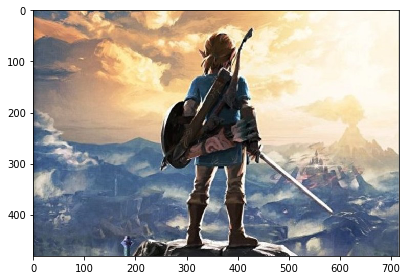

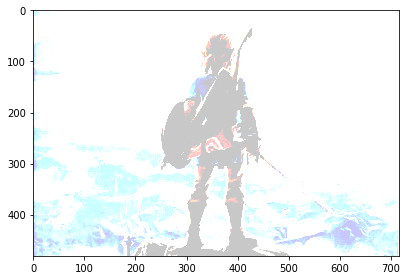

In [7]:
new_image = np.zeros(img1.shape,img1.dtype)

new_image = np.zeros(img1.shape,img1.dtype)

contrast = 3.0
bright = 2

for y in range (img1.shape[0]):
  for x in range (img1.shape[1]):
    for c in range (img1.shape[2]):
      new_image[y,x,c] = np.clip(contrast*img1[y,x,c],200,255)

figure(0)
io.imshow(img1)
figure(1)
io.imshow(new_image)

escala de grises

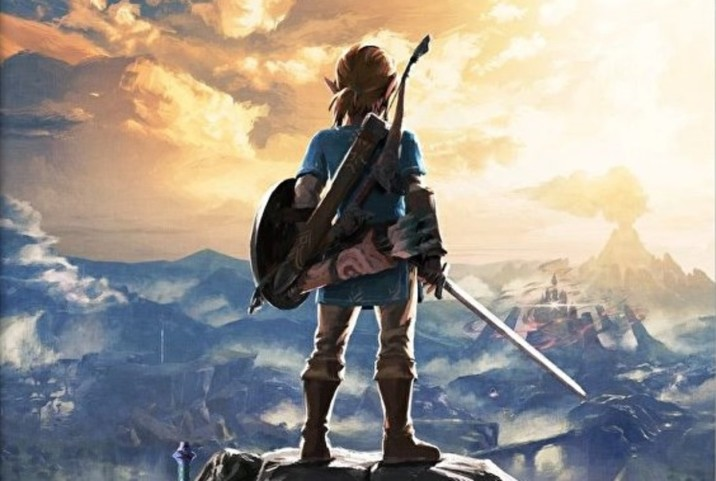

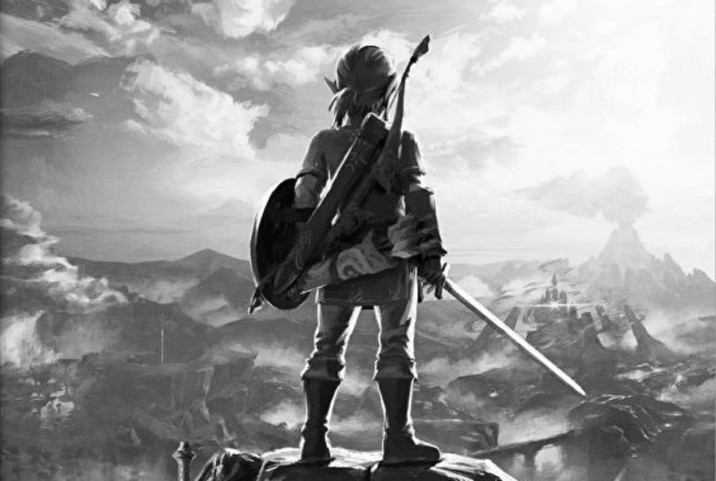

In [8]:
# conversion de la imagen a escala de grises
image3 = cv2.imread('/content/link_horizon.jpg')
gray = cv2.cvtColor(image3,cv2.COLOR_BGR2GRAY)

cv2_imshow(image3)
cv2_imshow(gray)

Escala de grises

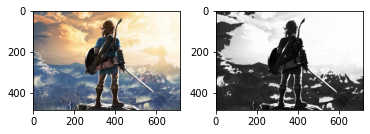

In [9]:
def getGrayColor (rgb):
  return rgb[0]

def setGrayColor (color):
  return [color, color, color]

img = Image.open('/content/link_horizon.jpg')
img = np.asarray(img)

ct = deepcopy(img)

r1 = 100
s1 = 50
r2 = 150
s2 = 200

for i in range(len(img)):
  for j in range (len(img[i])):
    x = getGrayColor(img[i][j])
    if (0 <= x and x <= r1) :
      ct[i][j] = setGrayColor(s1/r1 * x)
    elif (r1 < x and x <= r2) :
      ct[i][j] = setGrayColor(((s2 -s2)/(r2 - r1)) * (x - r1) + s1)
    elif (r2 < x and x <= 255):
      ct[i][j] = setGrayColor(((255 - s2)/(255 - r2)) * (x - r2) + s2)

plt.subplot(2,2,1)
plt.imshow(gray)
plt.subplot(2,2,2)
plt.imshow(ct)
plt.show()

Ejercicio 2. 

Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.

Seguridad: Las cámaras de seguridad a menudo utilizan imágenes negativas para resaltar las características de las personas y objetos en la escena.

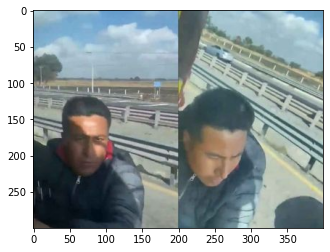

In [11]:
orig_img = cv2.imread('/content/ladron.jpg')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

plt.imshow(orig_img)

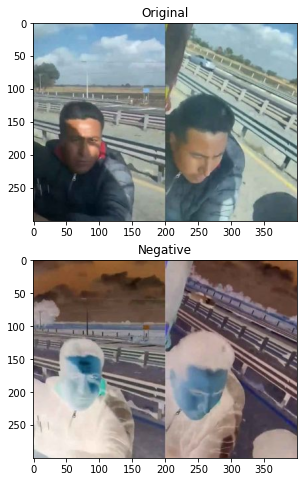

In [33]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

Ejercicio 3.

Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.

Videojuegos: La corrección de gamma se utiliza en videojuegos para mejorar la visualización de la imagen y adaptarla a diferentes condiciones de iluminación.


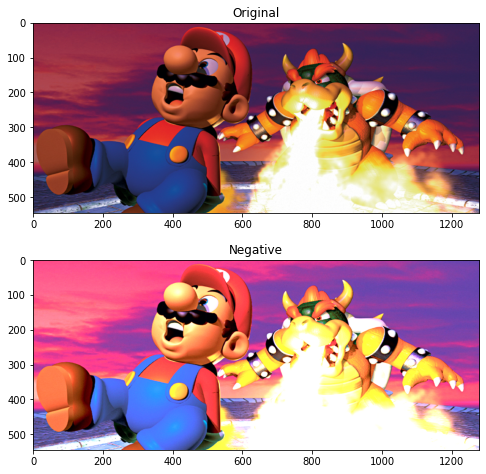

In [55]:
from PIL import ImageEnhance

# Abrir imagen
imagen = Image.open('/content/mario_64.jpg')

# Crear objeto para corrección de gamma
correccion_gamma = ImageEnhance.Brightness(imagen)

# Aplicar corrección de gamma con un factor de 2.0
imagen_corregida = correccion_gamma.enhance(2.0)


fig = plt.figure(figsize=(8, 8)) # si quitamos este parametro hay problema con plotear las imagenes

a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(imagen)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(imagen_corregida)
a.set_title('Negative')

plt.show()

# Guardar imagen corregida
##imagen_corregida.save("imagen_corregida.jpg")

Ejercicio 4.

Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.

Procesamiento de imágenes médicas: La sustracción de imágenes se utiliza en procesamiento de imágenes médicas, como la tomografía por emisión de positrones (PET) y la resonancia magnética (MRI), para eliminar el ruido y resaltar los detalles importantes de la imagen.

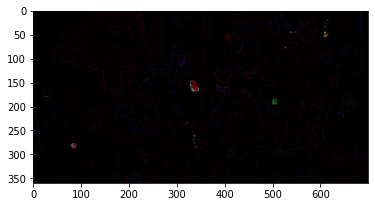

In [58]:
# Cargar imágenes
img1 = cv2.imread("/content/cuarto-desordenado-original.jpg")
img2 = cv2.imread("/content/cuarto-desordanado-diferencias.jpg")

# Realizar sustracción
result = cv2.subtract(img1, img2)

# Mostrar imagen resultante
plt.imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Guardar imagen resultante
# cv2.imwrite("resultado.jpg", result)


